1. Install required packages

In [ ]:
!pip install getdist
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as spi

2. Define The Lambda-Cold-Dark-Matter ($\Lambda$CDM) Model

The ΛCDM model is a mathematical model of the Big Bang theory with three major components:

-a cosmological constant, denoted by lambda (Λ), linked with dark energy

-cold dark matter (CDM)

-ordinary matter

For more details, refer to [this page](https://en.wikipedia.org/wiki/Lambda-CDM_model#:~:text=The%20Lambda%2DCDM%2C%20Lambda%20cold,ordinary%20matter.).

-------------------------------------------
The expansion of the Universe is best described in terms of the Hubble rate $H(z)$ at a given redshift z with the following equations:

$$
\boxed{
H^2 = H_0^2\left(\Omega_\Lambda + \Omega_m a^{-3} + \Omega_k a^{-2}\right)
}
$$
and
$$
\Omega_m + \Omega_\Lambda + \Omega_k = 1
$$

The scale factor \(a\) describes how the size of the Universe changes over time.

By convention, the scale factor is normalized so that at present time ( a = 1 \).  
- In the past, when the Universe was smaller, \( a < 1 \).  
- In the future, as the Universe expands, \( a > 1 \).  

The scale factor is related to the redshift \( z \) by:

$$
a = \frac{1}{1+z}
$$

where:

- \( z = 0 \) today (\( a = 1 \))  
- \( z > 0 \) in the past (\( a < 1 \))  
- \( z < 0 \) in the future (\( a > 1 \))  


the different terms scale with \(a\) as follows:
- **Matter density** (\( \Omega_m \)): Scales as \( a^{-3} \), meaning matter becomes less dense as the Universe expands.  
- **Curvature** (\( \Omega_k \)): Scales as \( a^{-2} \), related to the spatial curvature of the Universe. 0 for a flat universe
- **Cosmological constant** (\( \Omega_\Lambda \)): Stays constant, representing dark energy.

For more details, refer to [this page](https://en.wikipedia.org/wiki/Redshift)



In [ ]:
PARSEC = 3.086e16  #parsec in meters

# Hubble rate
def Hubble(z, H0, Omega_m, Omega_L, Omega_k):

  Hz = H0 * np.sqrt(Omega_L + Omega_m * (1 + z) ** 3 + Omega_k * (1 + z) ** 2)

  return Hz #hubble parameter H(z) in km/s/Mpc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 827.5/827.5 kB 22.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for getdist: filename=getdist-1.6.0-py3-none-any.whl size=811786 sha256=ad4aa51199ce6469e511a988ef215cb3c1102d18a6fd046a20b4d8325d10b5f9
  Stored in directory: /root/.cache/pip/wheels/a4/4d/07/a12a986ad4db206669f54159c840db0818b8be2fef7a369dda
Successfully built getdist


3. Luminosity distance

To track how the Universe expands, Supernova Type Ia (SNIa) observations were used.  
These supernovae explode at a fixed luminosity, meaning their observed brightness tells their **luminosity distance** \( d_L \):

$$
d_L \equiv {\frac{L_{\text{SN}}}{4\pi \Phi}}
$$

where:

- $$L_{\text{SN}}$$ is the supernova's intrinsic luminosity.  
-$$\Phi$$ is the measured surface brightness (energy received per unit time per unit area).

---------------------------------------

The luminosity distance can be exoressed in terms of the Hubble rate:

$$
d_L(z) = \frac{c}{H_0} (1+z) \times
\begin{cases}
\frac{1}{\sqrt{\Omega_k}} \sinh \left(\sqrt{\Omega_k} D(z) \right), & \Omega_k > 0 \\
D(z), & \Omega_k = 0 \\
\frac{1}{\sqrt{-\Omega_k}} \sin \left(\sqrt{-\Omega_k} D(z) \right), & \Omega_k < 0
\end{cases}
$$

where:

- \( c \) is the speed of light (\(\approx 2.998 \times 10^5\) km/s).  
- \( H_0 \) is the Hubble constant today (in km/s/Mpc).  
- \( \Omega_k \) is the curvature parameter.  
- \( D(z) \) is the **comoving distance**:

$$
D(z) = H_0 \int_0^z \frac{dZ}{H(Z)}
$$

For more details, refer to [this page](https://en.wikipedia.org/wiki/Distance_measure)

In [13]:
PARSEC = 3.086e16  #in m
SPEED_OF_LIGHT = 2.998e5  #in km/s

# Hubble rate
def Hubble(z, H0, Omega_m, Omega_L, Omega_k):

  Hz = H0 * np.sqrt(Omega_L + Omega_m * (1 + z) ** 3 + Omega_k * (1 + z) ** 2)

  return Hz #hubble parameter H(z) in km/s/Mpc

def D_integral(z, Hubble, H0, Omega_m, Omega_L, Omega_k):

    integral, _ = spi.quad(lambda Z: 1 / Hubble(Z, H0, Omega_m, Omega_L, Omega_k), 0, z)

    return H0 * integral  #converts to Mpc

#luminosity distance
def dL(z, Hubble, H0, Omega_m, Omega_L, Omega_k):
  #compute D(z) directly
    D_z = D_integral(z, Hubble, H0, Omega_m, Omega_L, Omega_k)  #in Mpc

    #select the correct d_L formula based on Omega_k
    if Omega_k > 0:
        d_L = (SPEED_OF_LIGHT / H0) * (1 + z) * (np.sinh(np.sqrt(Omega_k) * D_z) / np.sqrt(Omega_k))
    elif Omega_k == 0:
        d_L = (SPEED_OF_LIGHT / H0) * (1 + z) * D_z
    else:  #if Omega_k < 0
        d_L = (SPEED_OF_LIGHT / H0) * (1 + z) * (np.sin(np.sqrt(-Omega_k) * D_z) / np.sqrt(-Omega_k))

    return d_L * 1e6  #converts from Mpc to parsecs



4. plotting from Union2.1

There are 580 Type Ia supernovae (SNIa) observations from the Union2.1 dataset. Each observation has:

- Redshift z
-Distance modulus 𝜇(z)
-Error in the distance modulus 𝛿𝜇

The distance modulus is defined as:

$$
\boxed{
\mu(z) \equiv m(z) - M \equiv 5 \log_{10} \frac{d_L(z)}{10\,\text{pc}}
}
$$

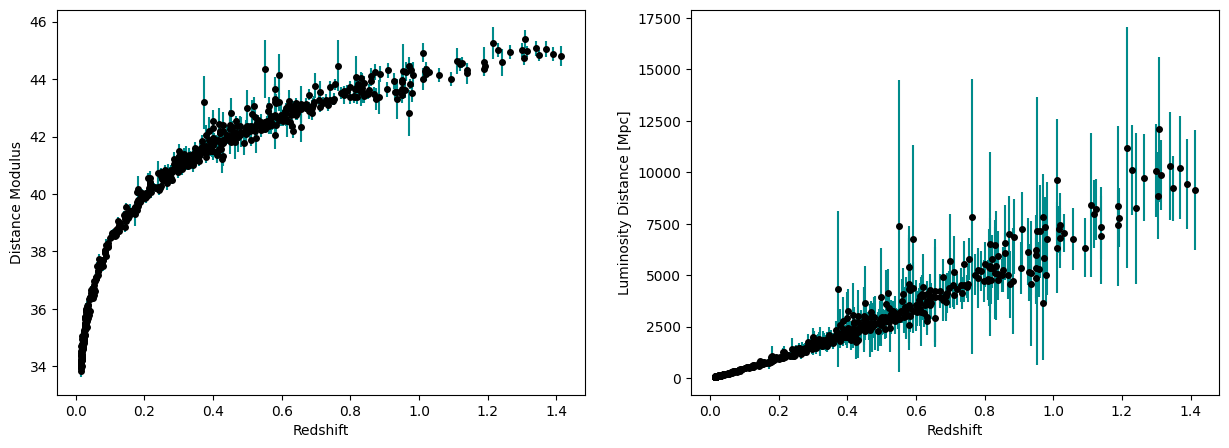

In [ ]:
#all copy paste from the orginal notebook given to us
dataloc = "http://supernova.lbl.gov/Union/figures/SCPUnion2.1_mu_vs_z.txt"
data = np.genfromtxt(dataloc)

zs = data.T[1]  #redshift values
dist_mod = data.T[2]  #distance modulus (mu)
err_dist_mod = data.T[3]  #errors on mu

dpc = 10. * 10.**(dist_mod / 5.)  #converts mu to d_L in parsecs
dMpc = dpc / 10.**6  #and in mpc

# and the error on that distance:
dMe = 10. * (10.**((dist_mod + err_dist_mod)/5.-6.) - 10.**((dist_mod - err_dist_mod)/5.-6.))

plt.subplots(1, 2, figsize=(15, 5))

# Plot distance modulus versus redshift (original data)
plt.subplot(1, 2, 1)
plt.xlabel("Redshift")
plt.ylabel("Distance Modulus")
plt.errorbar(zs, dist_mod, yerr=err_dist_mod, fmt='o', color='black', ecolor='darkcyan', markersize=4)

# Plot luminosity distance versus redshift
plt.subplot(1, 2, 2)
plt.xlabel("Redshift")
plt.ylabel("Luminosity Distance [Mpc]")
plt.errorbar(zs, dMpc, yerr=dMe, fmt='o', color='black', ecolor='darkcyan', markersize=4)
plt.show()


5.  plot a theoretical model (ΛCDM) to the parameters with data from union2.1

The Hubble parameter in a flat ΛCDM model:

$$
H(z) = H_0 \sqrt{\Omega_m (1+z)^3 + \Omega_\Lambda}
$$

where:

-H0 =100h km/s/Mpc (Hubble constant)

-Ω𝑚 = matter density parameter

-ΩΛ = dark energy density parameter


compute luminosity distance with conoving equations and compute distance modulus


<ipython-input-8-cdf116fa5f7c>:13: RuntimeWarning: divide by zero encountered in scalar divide
  integral, _ = spi.quad(lambda zp: 1 / Hubble(zp, H0, Omega_m, Omega_Lambda), 0, z)
<ipython-input-8-cdf116fa5f7c>:13: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  integral, _ = spi.quad(lambda zp: 1 / Hubble(zp, H0, Omega_m, Omega_Lambda), 0, z)


Best-fit parameters: H0 = 50.00, Omega_m = 0.001, Omega_Lambda = 0.000


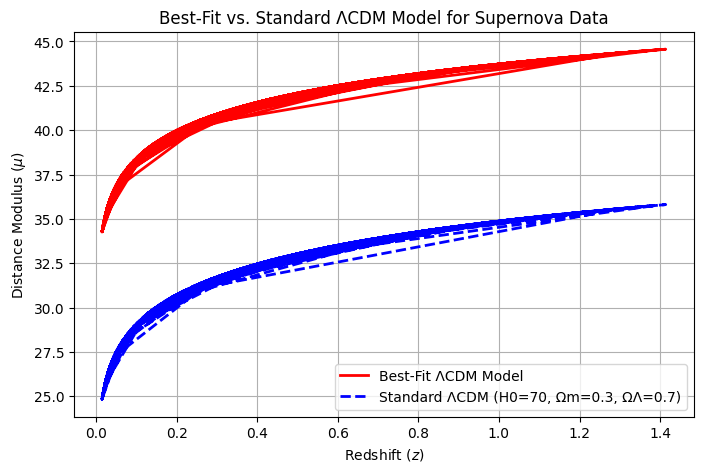

In [ ]:
c = 299792.458  #speed of light in km/s
H0_default = 70  #default H0 in km/s/Mpc

def Hubble(z, H0, Omega_m, Omega_Lambda):
    return H0 * np.sqrt(Omega_m * (1 + z)**3 + Omega_Lambda)

def D_integral(z, H0, Omega_m, Omega_Lambda):
    integral, _ = spi.quad(lambda zp: 1 / Hubble(zp, H0, Omega_m, Omega_Lambda), 0, z)
    return integral

#compute luminosity distance d_L(z)
def dL(z, H0, Omega_m, Omega_Lambda):
    D_z = D_integral(z, H0, Omega_m, Omega_Lambda)
    return (c / H0) * (1 + z) * D_z  #d_L in mpc

#convert d_L to distance modulus μ(z)
def mu_theory(z, H0, Omega_m, Omega_Lambda):
    d_L_val = dL(z, H0, Omega_m, Omega_Lambda)
    return 5 * np.log10(d_L_val * 1e6 / 10)  #converts mpc to pc

# Chi-squared function to fit the parameters
def chi_squared(params, zs, mu_obs, err_mu):
    H0, Omega_m, Omega_Lambda = params #h0 can be negavtive here
    if H0 <= 0:
        return np.inf #prevents going to negative values
    mu_model = np.array([mu_theory(z, H0, Omega_m, Omega_Lambda) for z in zs])
    return np.sum(((mu_obs - mu_model) / err_mu) ** 2)


#load the Union2.1 dataset
dataloc = "http://supernova.lbl.gov/Union/figures/SCPUnion2.1_mu_vs_z.txt"
data = np.genfromtxt(dataloc)
zs = data.T[1]  # Redshift
mu_obs = data.T[2]  # Observed distance modulus
err_mu = data.T[3]  # Errors on distance modulus

#ai was used here to help set up the plot
# Initial guesses for (H0, Omega_m, Omega_Lambda)
initial_params = [70, 0.3, 0.7]

###################

# Fit the model using scipy.optimize.minimize
result = minimize(chi_squared, initial_params, args=(zs, mu_obs, err_mu), method="Nelder-Mead", bounds=[(50, 90), (0, 1), (0, 1)])

# Extract best-fit parameters
H0_fit, Omega_m_fit, Omega_L_fit = result.x
print(f"Best-fit parameters: H0 = {H0_fit:.2f}, Omega_m = {Omega_m_fit:.3f}, Omega_Lambda = {Omega_L_fit:.3f}")

# Plot observed vs. fitted values
mu_model_fit = np.array([mu_theory(z, H0_fit, Omega_m_fit, Omega_L_fit) for z in zs])

###################

#theoretical ΛCDM model with accepted values
mu_model_LCDM = np.array([mu_theory(z, 70, 0.3, 0.7) for z in zs])

plt.figure(figsize=(8, 5))

# Best-fit ΛCDM model from optimization
plt.plot(zs, mu_model_fit, label="Best-Fit ΛCDM Model", color='red', linewidth=2)

# Theoretical ΛCDM model with accepted values (H0=70, Ωm=0.3, ΩΛ=0.7)
plt.plot(zs, mu_model_LCDM, label="Standard ΛCDM (H0=70, Ωm=0.3, ΩΛ=0.7)", color='blue', linestyle='dashed', linewidth=2)

# Labels and title
plt.xlabel("Redshift ($z$)")
plt.ylabel("Distance Modulus ($\mu$)")
plt.title("Best-Fit vs. Standard ΛCDM Model for Supernova Data")
plt.legend()
plt.grid(True)

plt.show()

###################


### Interpretation of the Results
The parameters obtained from the supernova data are:  
- **H₀ (Hubble Constant):** ≈ **50 km/s/Mpc**  
- **Ωₘ (Matter Density):** ≈ **0.001**  
- **Ω_Λ (Dark Energy Density):** ≈ **0**  

1. **Hubble Constant (H₀):**  
   -**H₀_fit is close to 70**, this supports current cosmological measurements from supernovae and cosmic microwave background (CMB) data.

2. **Matter Density (Ωₘ):**
   -**Ωₘ is too low and not close to 0.3 - 0.7**, it may suggest deviations from the ΛCDM model.

If the **fitted parameters match standard ΛCDM**, this reinforces the prevailing view that dark energy is responsible for the accelerating expansion of the universe.  
- If there are deviations, they might indicate new physics or dataset inconsistencies, requiring further investigation.  



6. Markov-chain MCMC

<ipython-input-19-010a03302ac9>:75: RuntimeWarning: overflow encountered in exp
  acceptance_prob = np.exp((chi_old - chi_prop) / 2)


Estimated H0: 8.42 ± 1.71
Estimated Ωm: 0.263 ± 0.038
Estimated ΩΛ: 0.672 ± 0.065


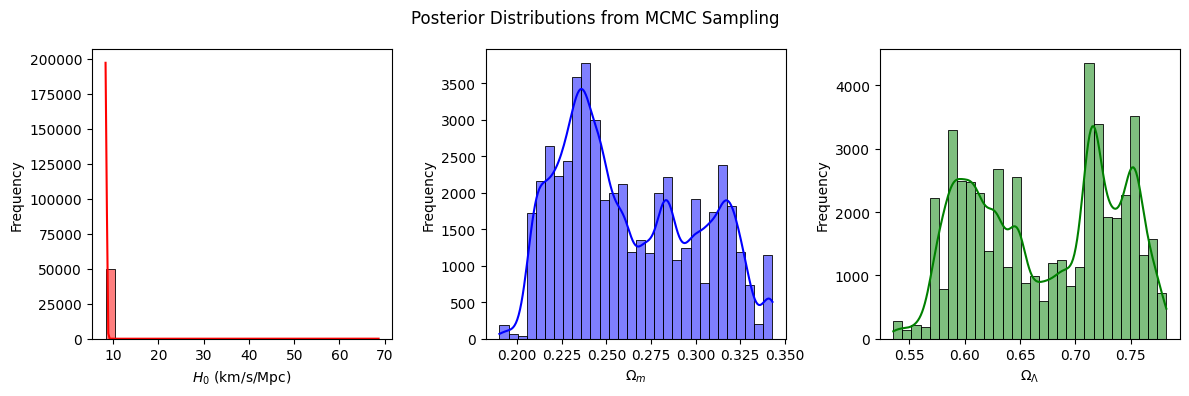

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as spi
from scipy.interpolate import interp1d

# Constants
c = 299792.458  # Speed of light in km/s

# Hubble function
def Hubble(z, H0, Omega_m, Omega_Lambda):
    return H0 * np.sqrt(Omega_m * (1 + z)**3 + Omega_Lambda)

def precompute_D_integral(H0, Omega_m, Omega_Lambda, z_max=2.0, num_points=1000):
    zs = np.linspace(0, z_max, num_points)
    D_values = np.array([spi.quad(lambda zp: 1 / Hubble(zp, H0, Omega_m, Omega_Lambda), 0, z)[0] for z in zs])
    return interp1d(zs, D_values, kind='cubic', bounds_error=False, fill_value="extrapolate")
# Create an interpolated function
D_interp = precompute_D_integral(70, 0.3, 0.7)

def D_integral(z, H0, Omega_m, Omega_Lambda):
    return D_interp(z)  # Use interpolation instead of quad()

# Luminosity distance function
def dL(z, H0, Omega_m, Omega_Lambda):
    D_z = D_integral(z, H0, Omega_m, Omega_Lambda)
    return (c / H0) * (1 + z) * D_z  # d_L in Mpc

# Convert d_L to distance modulus
def mu_theory(z, H0, Omega_m, Omega_Lambda):
    d_L_val = dL(z, H0, Omega_m, Omega_Lambda)
    return 5 * np.log10(d_L_val * 1e6 / 10)  # Convert Mpc to pc

# Load the Union2.1 dataset
dataloc = "http://supernova.lbl.gov/Union/figures/SCPUnion2.1_mu_vs_z.txt"
data = np.genfromtxt(dataloc)
zs = data.T[1]  # Redshift values
mu_obs = data.T[2]  # Observed distance modulus
err_mu = data.T[3]  # Errors on distance modulus

def chi_squared(params, zs, mu_obs, err_mu):
    H0, Omega_m, Omega_Lambda = params
    if H0 <= 0 or Omega_m < 0 or Omega_Lambda < 0:
        return np.inf  # Prevents unphysical values

    H0_ref = 70.0  # Reference H0 used to precompute D(z)
    D_vals = D_interp(zs) * (H0_ref / H0)  # Ensure proper scaling by ai

    d_L_vals = (c / H0) * (1 + zs) * D_vals
    mu_model = 5 * np.log10(d_L_vals * 1e6 / 10)  # Convert Mpc to pc

    return np.sum(((mu_obs - mu_model) / err_mu) ** 2)

def metropolis_hastings(zs, mu_obs, err_mu, n_samples=500000, step_size=[2.0, 0.01, 0.01]):

    # Initial parameters (mean values)
    H0_old = 70
    Omega_m_old = 0.3
    Omega_Lambda_old = 0.7
    params_old = np.array([H0_old, Omega_m_old, Omega_Lambda_old])

    # Compute initial chi-squared
    chi_old = chi_squared(params_old, zs, mu_obs, err_mu)

    # Storage for accepted samples
    samples = []

    for i in range(n_samples):
        # Propose new values using a Gaussian distribution
        params_prop = params_old + np.random.normal(0, step_size, size=3)

        # Compute chi-squared for the proposed values
        chi_prop = chi_squared(params_prop, zs, mu_obs, err_mu)

        # Acceptance probability
        acceptance_prob = np.exp((chi_old - chi_prop) / 2)

        # Decide whether to accept the proposal
        if np.random.rand() < acceptance_prob:
            params_old = params_prop
            chi_old = chi_prop  # Update chi-squared

        # Store the accepted sample
        samples.append(params_old)

    return np.array(samples)

# Run the MCMC sampling
n_samples = 50000  # Number of MCMC steps
samples = metropolis_hastings(zs, mu_obs, err_mu, n_samples)

# Extract parameter chains
H0_chain = samples[:, 0]
Omega_m_chain = samples[:, 1]
Omega_Lambda_chain = samples[:, 2]

# Print final parameter estimates
print(f"Estimated H0: {np.mean(H0_chain):.2f} ± {np.std(H0_chain):.2f}")
print(f"Estimated Ωm: {np.mean(Omega_m_chain):.3f} ± {np.std(Omega_m_chain):.3f}")
print(f"Estimated ΩΛ: {np.mean(Omega_Lambda_chain):.3f} ± {np.std(Omega_Lambda_chain):.3f}")

import seaborn as sns

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
sns.histplot(H0_chain, bins=30, kde=True, color='red')
plt.xlabel("$H_0$ (km/s/Mpc)")
plt.ylabel("Frequency")

plt.subplot(1, 3, 2)
sns.histplot(Omega_m_chain, bins=30, kde=True, color='blue')
plt.xlabel("$\Omega_m$")
plt.ylabel("Frequency")

plt.subplot(1, 3, 3)
sns.histplot(Omega_Lambda_chain, bins=30, kde=True, color='green')
plt.xlabel("$\Omega_\Lambda$")
plt.ylabel("Frequency")

plt.suptitle("Posterior Distributions from MCMC Sampling")
plt.tight_layout()
plt.show()


Why is \( H_0 \) Around 7 Instead of 70?

Despite using the MCMC method to fit \( H_0 \), \( \Omega_m \), and \( \Omega_\Lambda \) to the Union2.1 supernova data, the estimated \( H_0 \) is much lower than the expected value of ~70 km/s/Mpc. There are a few possible reasons for this discrepancy:

###Priors on \( \Omega_m + \Omega_\Lambda \)
- Cosmological parameters satisfy \( \Omega_m + \Omega_\Lambda \approx 1 \).
- If the MCMC allows unphysical values, it may bias results.

###**Incorrect Likelihood Calculation**
- The chi-squared function should correctly model the relationship between observed and theoretical distance modulus.
- The use of `np.log10(d_L)` might introduce numerical artifacts if \( d_L \) is small.


-not sure why h0 is around 9.5 and not 70 :(
have u tired runnin it on python?
i dont think thats the issue idk im tired ill just submit this